In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from matplotlib.backends.backend_pdf import PdfPages

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Clustering_EM_Heuristic/Joint-Xiaoyu/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Initialization

In [2]:
# colormap=('#4292c6','#BDB2FF', '#FF99C8' ,'#EEB422')
colormap=('#4292c6','#696969', '#CD5C5C' ,'#FFD700', '#6B8E23')
labels=['FFT-Kmeans','DTW-Kmeans','MIP-IF','EM Heuristic', 'MIP-IF-Gurobi']

In [20]:
path = './Result-Synthetic/'

# load results on Synthetic dataset
em_lds_mean = np.load(path+'f1_em_lds_mean.npy')
em_lds_std = np.load(path+'f1_em_lds_std.npy')
if_lds_mean = np.load(path+'f1_if_lds_mean.npy')
if_lds_std = np.load(path+'f1_if_lds_std.npy')
if_Gurobi_lds_mean = np.load(path+'f1_if_Gurobi_lds_mean.npy')
if_Gurobi_lds_std = np.load(path+'f1_if_Gurobi_lds_std.npy')

#duration_em_lds = np.load(path+'duration_em_lds.npy')
#duration_if_lds = np.load(path+'duration_if_lds.npy')
print(em_lds_mean.shape, em_lds_std.shape, if_lds_mean.shape, if_lds_std.shape, if_Gurobi_lds_mean.shape, if_Gurobi_lds_std.shape)

fft_lds_mean = np.load(path+'f1_fft_lds_mean.npy')
fft_lds_std = np.load(path+'f1_fft_lds_std.npy')
dtw_lds_mean = np.load(path+'f1_DTW_lds_mean.npy')
dtw_lds_std = np.load(path+'f1_DTW_lds_std.npy')

(3,) (3,) (3,) (3,) (3,) (3,)


In [8]:
path = './Result-Real/cd/'

# load results on ECG dataset
em_ecg_mean_cd = np.load(path+'f1_em_ecg_mean_cd.npy').reshape(5,3)
em_ecg_std_cd = np.load(path+'f1_em_ecg_std_cd.npy').reshape(5,3)
if_ecg_mean_cd = np.load(path+'f1_if_ecg_mean_cd.npy').reshape(5,3)
if_ecg_std_cd = np.load(path+'f1_if_ecg_std_cd.npy').reshape(5,3)
if_Gurobi_ecg_mean_cd = np.load(path+'f1_if_Gurobi_ecg_mean.npy').reshape(5,3)
if_Gurobi_ecg_std_cd = np.load(path+'f1_if_Gurobi_ecg_std.npy').reshape(5,3)

# result from fft and dtw test "2_method_DTW.ipynb" & "2_method_FFT.ipynb"
fft_ecg_mean_cd = np.load(path+'f1_fft_ecg_mean_cd.npy')
fft_ecg_std_cd = np.load(path+'f1_fft_ecg_std_cd.npy')
dtw_ecg_mean_cd = np.load(path+'f1_DTW_ecg_mean_cd.npy')
dtw_ecg_std_cd = np.load(path+'f1_DTW_ecg_std_cd.npy')

In [21]:
path = './Result-Real/'

# load results on ECG dataset
em_ecg_mean = np.load(path+'f1_em_ecg_mean.npy').reshape(5,3)
em_ecg_std = np.load(path+'f1_em_ecg_std.npy').reshape(5,3)
if_ecg_mean = np.load(path+'f1_if_ecg_mean.npy').reshape(5,3)
if_ecg_std = np.load(path+'f1_if_ecg_std.npy').reshape(5,3)
duration_em_ecg = np.load(path+'duration_em_ecg.npy')
duration_if_ecg = np.load(path+'duration_if_ecg.npy')

# result from fft and dtw test "2_method_DTW.ipynb" & "2_method_FFT.ipynb"
fft_ecg_mean = np.load(path+'f1_fft_ecg_mean.npy')
fft_ecg_std = np.load(path+'f1_fft_ecg_std.npy')
dtw_ecg_mean = np.load(path+'f1_DTW_ecg_mean.npy')
dtw_ecg_std = np.load(path+'f1_DTW_ecg_std.npy')

## Synthetic Plot

In [10]:
##############################################
############# plot for n = 2,3,4 #############
########## fft, dtw, ind, emh, gurobi ########
##############################################

met_range=[*range(5)]
nx_range=np.arange(2,5)

Text(0, 0.5, 'F1 score')

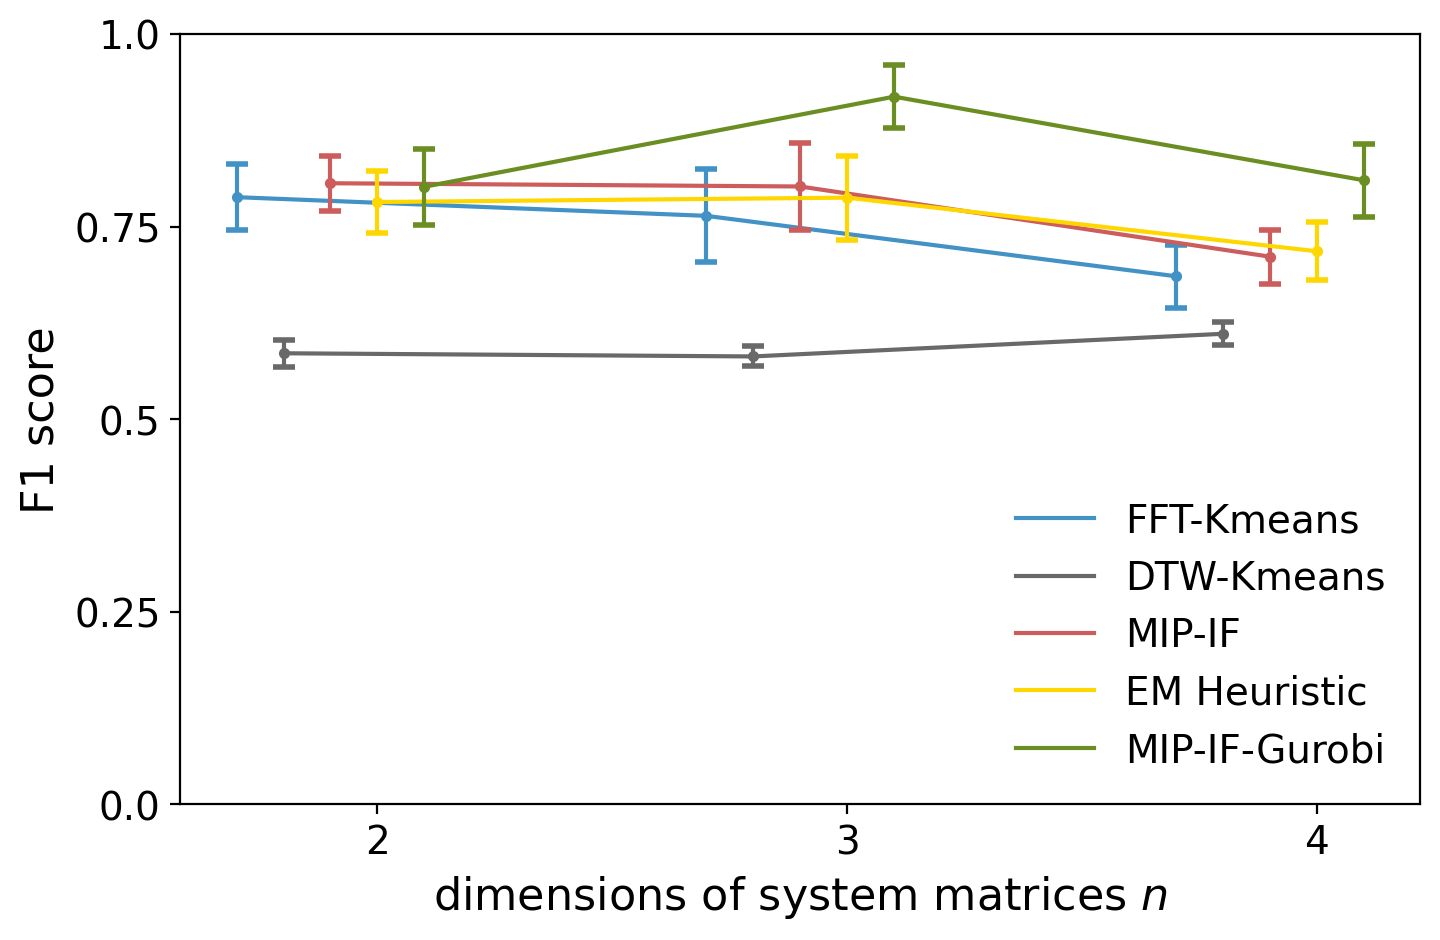

In [11]:
# fig = plt.figure(figsize=(10,6), dpi=100)
mean = np.array([fft_lds_mean, dtw_lds_mean, if_lds_mean, em_lds_mean, if_Gurobi_lds_mean])
std = np.array([fft_lds_std, dtw_lds_std, if_lds_std, em_lds_std,if_Gurobi_lds_std ])
fig, ax = plt.subplots(figsize=(8,5), dpi=200)
width=0.1
for m in met_range:
    x=nx_range+m*width
    y=mean[m,:]
    y_error=1.96*std[m,:]/np.sqrt(50)
    ax.plot(x,y, color=colormap[m],label=labels[m])
    ax.errorbar(x, y, yerr = y_error, fmt ='.', color=colormap[m],capsize=4,capthick=2) #,align='edge'

# plt.legend(bbox_to_anchor=(1.02,1.25),fontsize=14,frameon=False,ncol=2)
plt.legend(fontsize=14,frameon=False,ncol=1,loc='lower right')
plt.yticks(ticks=[0.0,0.25,0.5,0.75,1.0],labels=[0.0,0.25,0.5,0.75,1.0],fontsize=14)
plt.xticks(ticks=[2.3,3.3,4.3],labels=[2,3,4],fontsize=14)
plt.xlabel('dimensions of system matrices '+r'$n$',fontsize=16)
plt.ylabel('F1 score',fontsize=16)
# plt.savefig('prettyplot_higherdim.pdf', bbox_inches='tight')

## ECG Plot

### Compare baseline

In [12]:
##############################################
################## plot for ECG ##############
########## fft, dtw, ind, emh, Gurobi ########
##############################################

met_range=[*range(5)]
nx_range=np.array([2,3,4,5,6])

## Compare with dimension of hidden state equal to 3
mean2 = np.array([fft_ecg_mean_cd, dtw_ecg_mean_cd, if_ecg_mean_cd[:,2], em_ecg_mean_cd[:,2], if_Gurobi_ecg_mean_cd[:,2]]) # Include if_Gurobi_ecg_mean_cd[:,1] inside the main list
std2 = np.array([fft_ecg_std_cd, dtw_ecg_std_cd, if_ecg_std_cd[:,2], em_ecg_std_cd[:,2], if_Gurobi_ecg_std_cd[:,2]]) # Include if_Gurobi_ecg_std_cd[:,1] inside the main list

Text(0, 0.5, 'F1 score')

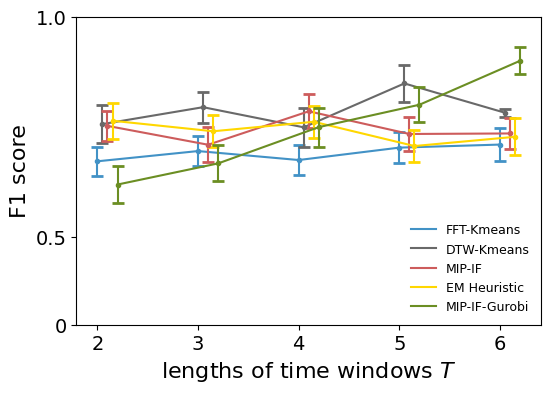

In [17]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
width=0.05
for m in met_range:
    n = nx_range[m]
    x=nx_range+m*width
    # y=mean.loc[m,:]
    # y_error=mean.loc[m,:]-std.loc[m,0:2]
    y=mean2[m,:]
    y_error=1.96*std2[m,:]/np.sqrt(50)
    # ax.bar(x,2, color=colormap[m], width=width,bottom=y.tolist())
    ax.plot(x,y, color=colormap[m],label=labels[m])
    ax.errorbar(x, y, yerr = y_error, fmt ='.', color=colormap[m],capsize=4,capthick=2) #,align='edge'

# plt.legend(bbox_to_anchor=(1.02,1.25),fontsize=14,frameon=False,ncol=2)
plt.legend(fontsize=9,frameon=False,ncol=1,loc='lower right')
plt.yticks(ticks=[0.3,0.5,1],labels=[0,0.5,1.0],fontsize=14)
plt.xticks(ticks=[2,3,4,5,6],labels=[2,3,4,5,6],fontsize=14)
plt.xlabel('lengths of time windows ' + r'$T$',fontsize=16)
plt.ylabel('F1 score',fontsize=16)
# plt.savefig('prettyplot_higherdim.pdf', bbox_inches='tight')

### Compare N & runtime

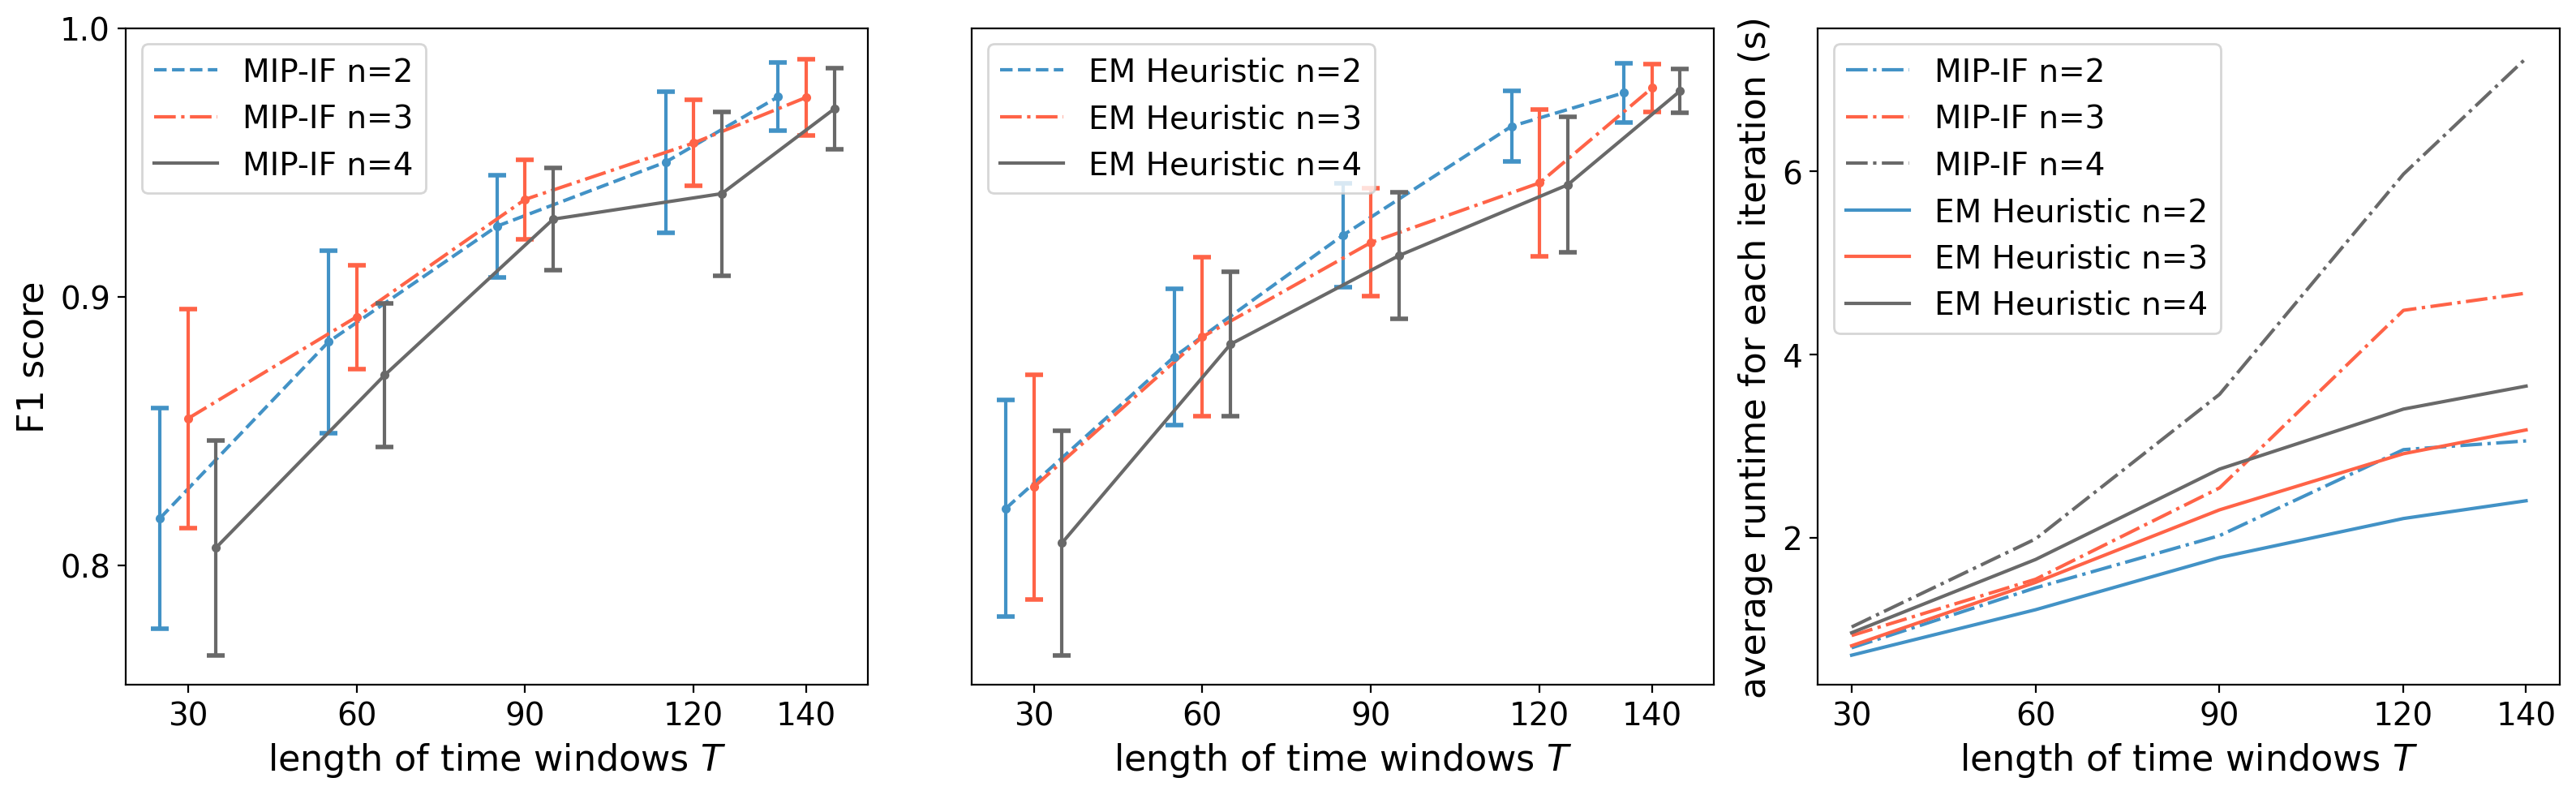

In [ ]:
# comparison between EM and MIP-IF
linestyle = ['--', '-.','-']
linestyle2 = ['-.','-']
labels2 = ['n=2', 'n=3', 'n=4']
labels3 = ['MIP-IF n=2', 'MIP-IF n=3', 'MIP-IF n=4']
labels4 = ['EM Heuristic n=2', 'EM Heuristic n=3', 'EM Heuristic n=4']
# colormap2 = ['#4292c6','#FF6347', '#FF8C00']
colormap2 = ['#4292c6','#FF6347', '#696969']
colormap3 = ['#4292c6','#4292c6', '#4292c6']
colormap4 = ['#FF6347','#FF6347', '#FF6347']


# duratino_time

fig = plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot2grid((1, 3), (0, 0))
width = 5
nx_range=np.array([30,60,90,120,140])

# 1st subplot
for m in range(3):
    x=nx_range+m*width
    # x = np.array([30,60,90,120,140])
    # y=mean.loc[m,:]
    # y_error=mean.loc[m,:]-std.loc[m,0:2]
    y=if_ecg_mean[:,m]
    y_error=1.96*if_ecg_std[:,m]/np.sqrt(50)
    # ax.bar(x,2, color=colormap[m], width=width,bottom=y.tolist())
    ax1.plot(x,y, color=colormap2[m],ls = linestyle[m],label=labels3[m])
    # ax1.fill_between(x,y-y_error,y+y_error,color=colormap2[m], alpha=0.2)
    ax1.errorbar(x, y, yerr = y_error, fmt ='.', color=colormap2[m],capsize=4,capthick=2) #,align='edge'
    ax1.set_xticks(ticks=[30+width,60+width,90+width,120+width,140+width],labels=[30,60,90,120,140],fontsize=14)
    ax1.set_yticks(ticks=[0.8,0.9,1.0],labels=[0.8,0.9,1.0],fontsize=14)
ax1.set_ylabel('F1 score',fontsize=16)
ax1.set_xlabel('length of time windows '+r'$T$',fontsize=16)
plt.legend(fontsize=14,ncol=1,loc='upper left')

# 2nd subplot
ax2 = plt.subplot2grid((1, 3), (0, 1))
for m in range(3):
    x=nx_range+m*width
    y=em_ecg_mean[:,m]
    y_error=1.96*em_ecg_std[:,m]/np.sqrt(50)
    ax2.plot(x,y, color=colormap2[m],ls = linestyle[m],label=labels4[m])
    # ax2.fill_between(x,y-y_error,y+y_error,color=colormap2[m], alpha=0.2)
    ax2.errorbar(x, y, yerr = y_error, fmt ='.', color=colormap2[m],capsize=4,capthick=2) #,align='edge'
    ax2.set_xticks(ticks=[30+width,60+width,90+width,120+width,140+width],labels=[30,60,90,120,140],fontsize=14)
    ax2.set_yticks(ticks=[0.8,0.9,1.0],labels=[0.8,0.9,1.0],fontsize=14)
    ax2.set_yticks([])
ax2.set_xlabel('length of time windows '+r'$T$',fontsize=16)
plt.legend(fontsize=14,ncol=1,loc='upper left')

# 3rd subplot
ax3 = plt.subplot2grid((1, 3), (0, 2))

for m in range(3):
    x = np.array([30,60,90,120,140])
    y_if=duration_if_ecg[:,m]/50
    ax3.plot(x,y_if, color=colormap2[m],ls = linestyle2[0],label=labels3[m])
for m in range(3):
    y_em=duration_em_ecg[:,m]/50
    ax3.plot(x,y_em, color=colormap2[m],ls = linestyle2[1],label=labels4[m])
    # ax1.set_xlabel('X1')
    # ax1.set_ylabel('Y1', color='b')
    ax3.set_xticks(ticks=[30,60,90,120,140],labels=[30,60,90,120,140],fontsize=14)
    ax3.set_yticks(ticks=[2,4,6],labels=[2,4,6],fontsize=14)
    # ax3.set_title('Subplot 3',fontsize=16)
    ax3.set_xlabel('length of time windows '+r'$T$',fontsize=16)
ax3.set_ylabel('average runtime for each iteration (s)',fontsize=16)
plt.legend(fontsize=14,ncol=1,loc='upper left')
plt.tight_layout()
plt.show()

## NCPOP Plot

In [ ]:
### load results on bonmin ###
em_bonmin_mean = np.load(path+'em_bonmin_mean.npy')
em_bonmin_std = np.load(path+'em_bonmin_std.npy')
bonmin_duration = np.load(path+'bonmin_duration.npy')
print(em_bonmin_mean, em_bonmin_std, bonmin_duration)

[[0.72842713 0.61909091 0.78777778]
 [0.8048951  0.8969697  0.92666667]
 [0.84267288 0.76423576 0.84206349]] [[0.152654   0.12934674 0.16712529]
 [0.14474304 0.12211783 0.09043107]
 [0.13021523 0.17374807 0.1635845 ]] [[2.13764977 1.48097277 2.01778674]
 [3.93240571 2.79596567 2.76506829]
 [3.16290975 5.29785204 9.3124547 ]]


In [ ]:
### load results on NCPOP ###
ncpop_mean = np.load(path+'ncpop_mean.npy')
ncpop_std = np.load(path+'ncpop_std.npy')
ncpop_duration = np.load(path+'ncpop_duration.npy')
print(ncpop_mean, ncpop_std, ncpop_duration)

[0.79388167 0.69852148 0.92727273] [0.17427552 0.14050271 0.10601731] [  26.4985456   874.25871382 5514.62468638]


In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_18731/3160368927.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


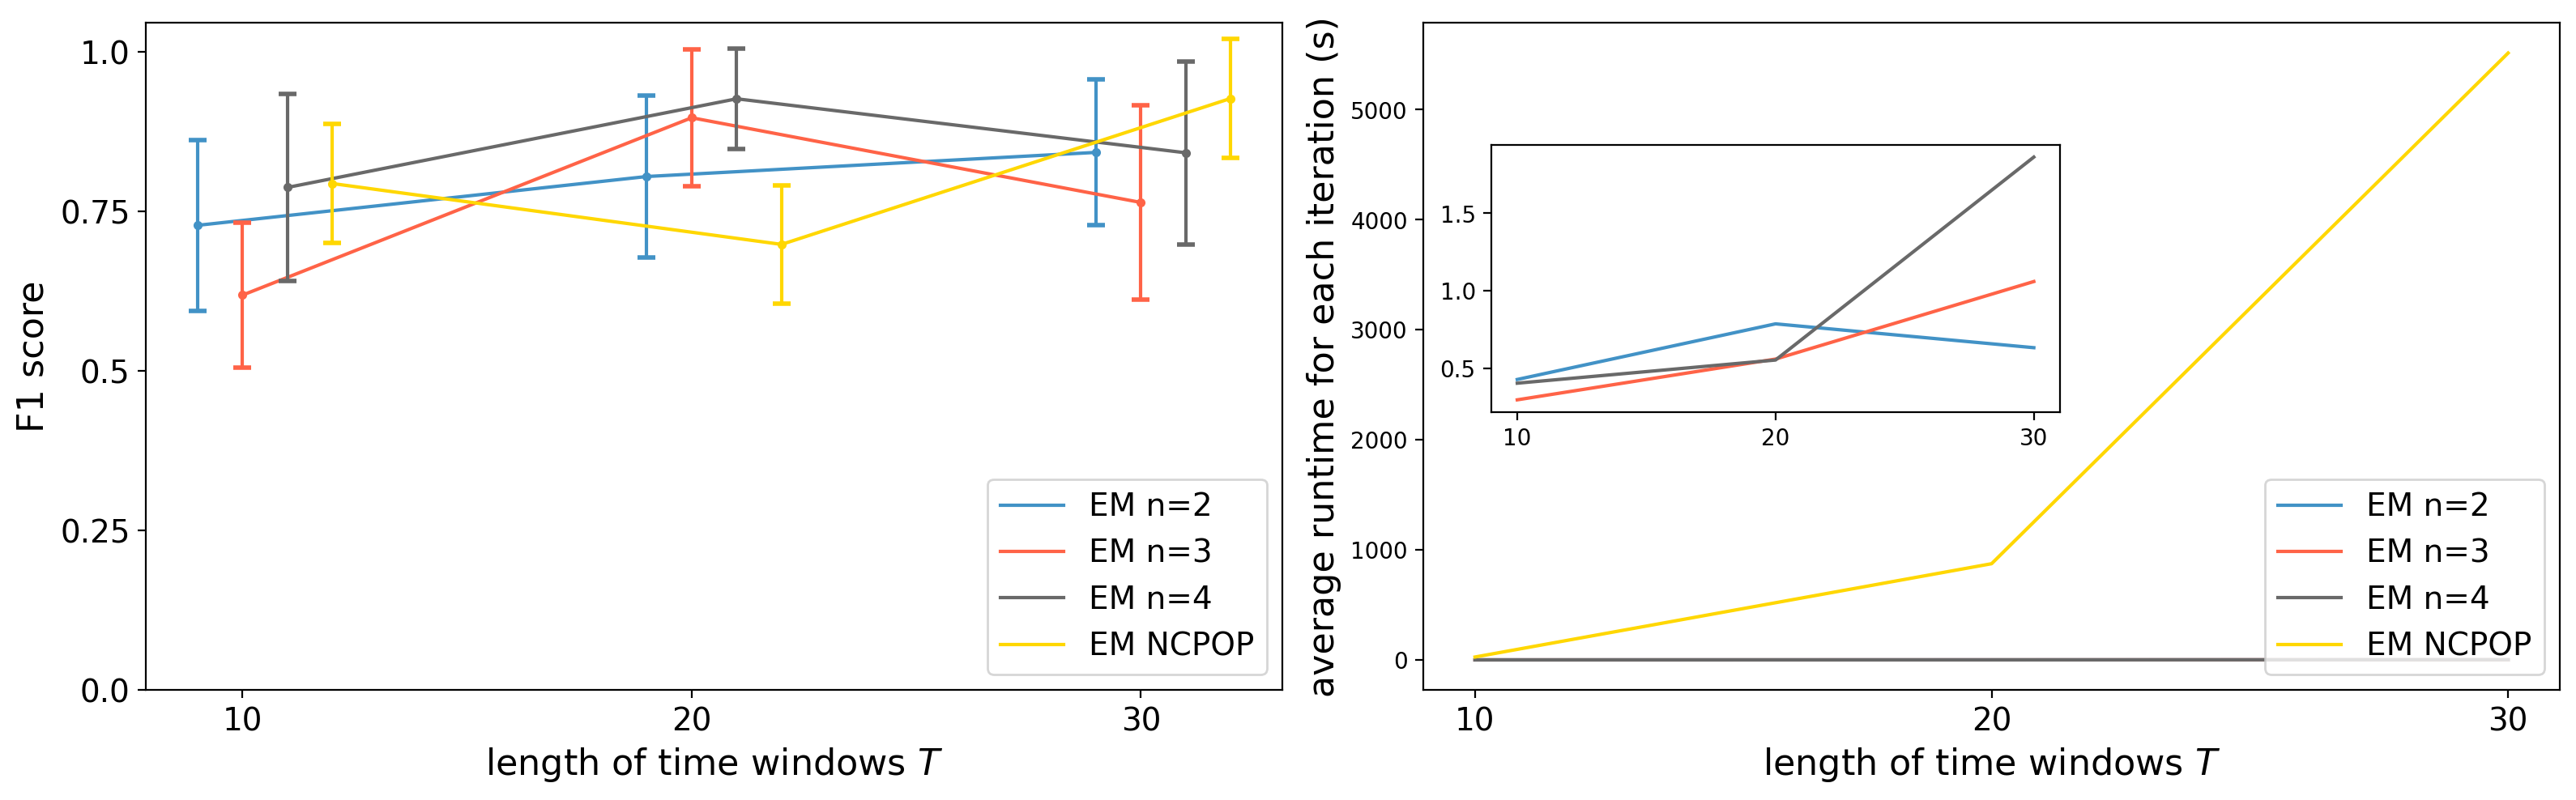

In [ ]:
###  Comparison for NCPOP  ###
labels3 = ['EM n=2', 'EM n=3', 'EM n=4']
colormap2 = ['#4292c6','#FF6347', '#696969']
colormap3 = ['#4292c6','#4292c6', '#4292c6']
colormap4 = ['#FF6347','#FF6347', '#FF6347']


# duratino_time

fig = plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot2grid((1, 2), (0, 0))
width = 1
nx_range=np.array([10,20,30])

# 1st subplot
for m in range(4):
    if m == 3:
        x=nx_range+m*width
        y = ncpop_mean
        y_error = 1.96*ncpop_std[-1]/np.sqrt(5)
        ax1.plot(x,y, color=colormap[3],label='EM NCPOP')
        ax1.errorbar(x, y, yerr = y_error, fmt ='.', color=colormap[3],capsize=4,capthick=2) #,align='edge'
    else:
        x=nx_range+m*width
        y=em_bonmin_mean[:,m]
        y_error=1.96*em_bonmin_std[:,m]/np.sqrt(5)
        ax1.plot(x,y, color=colormap2[m],label=labels3[m])
        ax1.errorbar(x, y, yerr = y_error, fmt ='.', color=colormap2[m],capsize=4,capthick=2) #,align='edge'
    ax1.set_xticks(ticks=[10+width,20+width,30+width],labels=[10,20,30],fontsize=14)
    ax1.set_yticks(ticks=[0.0,0.25,0.5,0.75,1.0],labels=[0.0,0.25,0.5,0.75,1.0],fontsize=14)
ax1.set_ylabel('F1 score',fontsize=16)
ax1.set_xlabel('length of time windows '+r'$T$',fontsize=16)
plt.legend(fontsize=14,ncol=1,loc='lower right')

#2nd subplot
ax2 = plt.subplot2grid((1, 2), (0, 1))

for m in range(4):
    if m == 3:
        x = np.array([10,20,30])
        y=ncpop_duration
        ax2.plot(x,y, color=colormap[3],label='EM NCPOP')
    else:
        x = np.array([10,20,30])
        y = bonmin_duration[:,m]/5
        ax2.plot(x,y, color=colormap2[m],label=labels3[m])

    ax2.set_xticks(ticks=[10,20,30],labels=[10,20,30],fontsize=14)
    # ax3.set_yticks(ticks=[2,4,6],labels=[2,4,6],fontsize=14)
    # ax3.set_title('Subplot 3',fontsize=16)
    ax2.set_xlabel('length of time windows '+r'$T$',fontsize=16)
ax2.set_ylabel('average runtime for each iteration (s)',fontsize=16)
plt.legend(fontsize=14,loc='lower right')

axins = inset_axes(ax2, width="50%", height="40%", loc='lower left',
                   bbox_to_anchor=(0.05, 0.4, 1, 1),
                   bbox_transform=ax2.transAxes)

for m in range(3):
    axins.plot(np.array([10,20,30]), bonmin_duration[:,m]/5, color=colormap2[m])
axins.set_xticks(ticks=[10,20,30],labels=[10,20,30])

plt.tight_layout()
plt.show()